In [19]:

# IMPORTING REQUIRED MODULES
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# NEURAL NETWORKS MODULES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [21]:
# KERAS MODULES
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import Callback
import keras.backend as kb
import tensorflow as tf

In [22]:
from datetime import datetime

def timer(start_time= None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now()-start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec,2)))

In [23]:
data = pd.read_csv("Final Data set v5.csv")

In [24]:
data.head()

,SUM_INSURED,ESTIMATED_AMOUNT,PREMIUM,MONTHS_AS_CUSTOMER,VEHICLE_CATEGORY,STATUS,ACCIDENT_TIME,PURPOSE_OF_USE,MAKE,GAP_IN_DAYS,FRAUD_OR_NOT
0,1000000,48110.0,8514.85,86,3,3,0,10,35,114,0
1,3000000,80000.0,54000.00,72,2,4,1,13,24,43,0
2,3000000,500000.0,54000.00,55,2,4,6,13,24,23,0
3,750000,37050.0,4792.65,184,2,7,4,13,35,14,0
4,750000,66750.0,4792.65,164,2,7,3,13,35,76,0


In [25]:
# SETTING UP THE TRAINING AND TESTING SETS
np.random.seed(123) 

x =  data.iloc[:,0:10]
y = data.iloc[:, -1]



In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential([
    Dense(units=20, input_dim = x_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_12 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_14 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 1,753
Trainable params: 1,753
Non-trainable params: 0
____________________________________________________

In [28]:

start_time = timer(None)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=30, epochs=5)

timer(start_time)

Epoch 1/5
21068/21068 [==============================] - 1s 34us/step - loss: 1575.3485 - accuracy: 0.8925
Epoch 2/5
21068/21068 [==============================] - 1s 28us/step - loss: 154.5537 - accuracy: 0.8130
Epoch 3/5
21068/21068 [==============================] - 1s 30us/step - loss: 19.8526 - accuracy: 0.8711
Epoch 4/5
21068/21068 [==============================] - 1s 33us/step - loss: 2.7980 - accuracy: 0.9356
Epoch 5/5
21068/21068 [==============================] - 1s 32us/step - loss: 8.9680 - accuracy: 0.9222

 Time taken: 0 hours 0 minutes and 3.87 seconds.


In [29]:
score = model.evaluate(x_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

9030/9030 [==============================] - 0s 13us/step
Test Accuracy: 94.50%
Test Loss: 68.82941647906966


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8074
           1       0.90      0.54      0.68       956

    accuracy                           0.94      9030
   macro avg       0.92      0.77      0.82      9030
weighted avg       0.94      0.94      0.94      9030



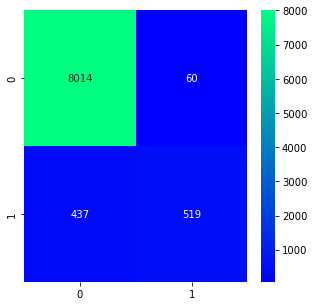

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)
y_test = pd.DataFrame(y_test)



# making a classification report
cr = classification_report(y_test,  y_pred.round())
print(cr)



# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot = True, cmap = 'winter', fmt=".0f")
plt.show()

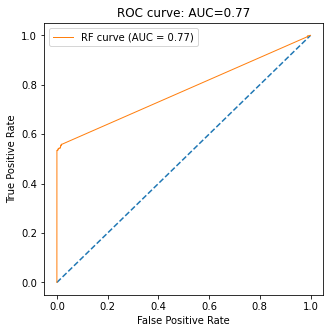

In [31]:
from sklearn.metrics import roc_curve, auc

from matplotlib import pyplot



ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict(x_test).ravel()




# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

roc_auc_rf = auc(lr_fpr, lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC curve: AUC={0:0.2f}'.format(
          roc_auc_rf))
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Average precision-recall score ANN: 0.6017715388308678


Text(0.5, 1.0, '2-class Precision-Recall curve: AUC=0.74')

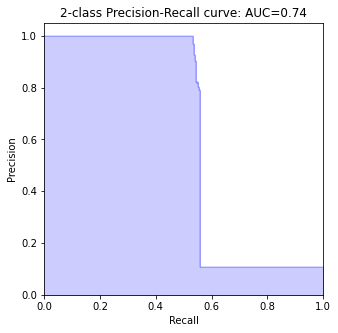

In [32]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

y_score_ANN = model.predict(x_test).ravel()
average_precision = average_precision_score(y_test, y_score_ANN)

print('Average precision-recall score ANN: {}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_score_ANN)

pr_auc_ANN = auc( recall,precision)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          pr_auc_ANN))

In [33]:
from imblearn.over_sampling import SMOTE

np.random.seed(123)

x_resample, y_resample  = SMOTE().fit_resample(x, y)

In [34]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.3, random_state = 0)

model = Sequential([
    Dense(units=20, input_dim = x_train2.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_17 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_19 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 25        
Total params: 1,753
Trainable params: 1,753
Non-trainable params: 0
____________________________________________________

In [35]:
start_time = timer(None)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train2, y_train2, batch_size=30, epochs=5)

timer(start_time)

Epoch 1/5
37779/37779 [==============================] - 1s 37us/step - loss: 4332.5200 - accuracy: 0.6777
Epoch 2/5
37779/37779 [==============================] - 1s 33us/step - loss: 175.1594 - accuracy: 0.6710
Epoch 3/5
37779/37779 [==============================] - 1s 32us/step - loss: 18.4851 - accuracy: 0.6435
Epoch 4/5
37779/37779 [==============================] - 1s 34us/step - loss: 0.6283 - accuracy: 0.7621
Epoch 5/5
37779/37779 [==============================] - 1s 33us/step - loss: 0.5498 - accuracy: 0.7651

 Time taken: 0 hours 0 minutes and 6.94 seconds.


              precision    recall  f1-score   support

           0       0.68      1.00      0.81      8070
           1       1.00      0.52      0.69      8121

    accuracy                           0.76     16191
   macro avg       0.84      0.76      0.75     16191
weighted avg       0.84      0.76      0.75     16191



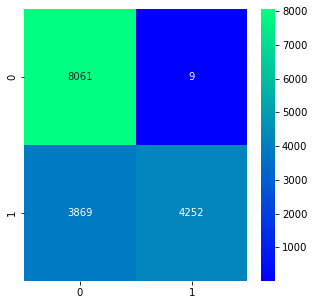

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test2)
y_test = pd.DataFrame(y_test2)



# making a classification report
cr = classification_report(y_test2,  y_pred.round())
print(cr)



# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test2, y_pred.round())
sns.heatmap(cm, annot = True, cmap = 'winter', fmt=".0f")
plt.show()

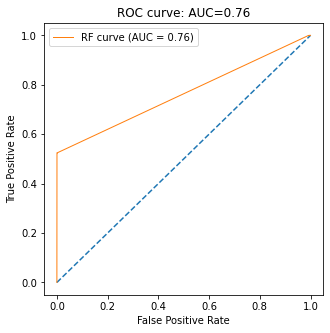

In [37]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict(x_test2).ravel()




# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test2, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test2, lr_probs)

roc_auc_ANN = auc(lr_fpr, lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_ANN))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC curve: AUC={0:0.2f}'.format(
          roc_auc_ANN))
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Average precision-recall score ANN: 0.7635897062509686


Text(0.5, 1.0, '2-class Precision-Recall curve: AUC=0.88')

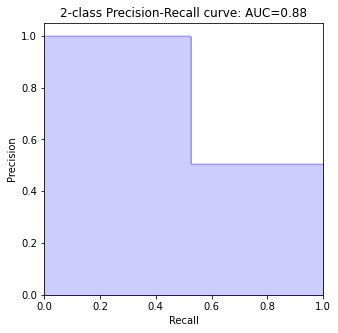

In [38]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

y_score_ANN = model.predict(x_test2).ravel()
average_precision = average_precision_score(y_test2, y_score_ANN)

print('Average precision-recall score ANN: {}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test2, y_score_ANN)

pr_auc_ANN = auc( recall,precision)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          pr_auc_ANN))